## 0. Import and Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# DATA_PATH = '/opt/ml/input/data/train_dataset/train_data.csv'
# DATA_PATH = '/opt/ml/input/data/train_dataset/tuning_train_data.csv'
DATA_PATH = '/opt/ml/input/data/train_dataset/tuning_train_data_2.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 8.65 s, sys: 968 ms, total: 9.62 s
Wall time: 9.62 s


## 1.1 기본적인 내용 파악

정리하면,   
`userID` 사용자의 고유 번호입니다. 총 7,442명의 학생이 있습니다.   
`assessmentItemID` 사용자가 푼 문항의 일련 번호입니다.   
`testId` 사용자가 푼 문항이 포함된 시험지의 일련 번호입니다.   
`answerCode` 사용자가 푼 문항의 정답 여부를 담고 있는 이진 (0/1) 데이터입니다.   
`Timestamp` 사용자가 문항을 푼 시간 정보입니다.   
`KnowledgeTag` 사용자가 푼 문항의 고유 태그가 담겨져 있습니다.   
특성 별로 자세히 살펴봅시다.

### 특성의 기본 정보

In [3]:
df

,Unnamed: 0,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,Category,Number,Time,...,total_used_time,past_count,past_correct,average_correct,past_tag_count,past_tag_correct,average_tag_correct,past_content_count,past_content_correct,average_content_correct
0,0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1001,1585009031,...,3,0,0.0,0.000000,0,0.0,0.00,0,0.0,0.0
1,1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,1002,1585009034,...,11,1,1.0,1.000000,0,0.0,0.00,0,0.0,0.0
2,2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,1003,1585009042,...,18,2,2.0,1.000000,1,1.0,1.00,0,0.0,0.0
3,3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,1004,1585009049,...,25,3,3.0,1.000000,2,2.0,1.00,0,0.0,0.0
4,4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,1005,1585009056,...,36,4,4.0,1.000000,3,3.0,1.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,71005,1591339821,...,220,4,1.0,0.250000,4,1.0,0.25,0,0.0,0.0
2266582,2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,165001,1597971999,...,11,5,1.0,0.200000,0,0.0,0.00,0,0.0,0.0
2266583,2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,165002,1597972010,...,57,6,2.0,0.333333,1,1.0,1.00,0,0.0,0.0
2266584,2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,165003,1597972056,...,130,7,3.0,0.428571,2,2.0,1.00,0,0.0,0.0


In [4]:
df.dtypes

Unnamed: 0                          int64
userID                              int16
assessmentItemID                   object
testId                             object
answerCode                           int8
Timestamp                  datetime64[ns]
KnowledgeTag                        int16
Category                            int64
Number                              int64
Time                                int64
solTime                             int64
hour                                int64
weekday                             int64
total_used_time                     int64
past_count                          int64
past_correct                      float64
average_correct                   float64
past_tag_count                      int64
past_tag_correct                  float64
average_tag_correct               float64
past_content_count                  int64
past_content_correct              float64
average_content_correct           float64
dtype: object

In [5]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {df.userID.nunique()}
assessmentItemID : {df.assessmentItemID.nunique()}
testID           : {df.testId.nunique()}
mean answer rate : {df.answerCode.sum() / df.shape[0] * 100:.2f}%
KnowledgeTag     : {df.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 6698
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.44%
KnowledgeTag     : 912
--------------------------


### 일련 번호 분석

#### 첫 번째 단어 A
A 밖에 없는 것을 확인할 수 있음

In [6]:
df['assessmentItemID'].apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

#### 문항 일련 번호 내 시험지 번호

In [7]:
sum(df['assessmentItemID'].apply(lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:]))

2266586

#### 시험지 번호 가운데 3자리 모두 000

In [8]:
df['testId'].apply(lambda x: x[4:7]).unique()

array(['000'], dtype=object)

## 1.2 기술 통계량 분석

In [9]:
def percentile(s):
    return np.sum(s) / len(s)

### 사용자 분석

In [10]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


In [11]:
stu_groupby.head(10)

,assessmentItemID,answerCode
userID,,
0,745,0.630872
1,933,0.853162
2,276,0.612319
5,833,0.795918
6,921,0.442997
7,812,0.607143
8,536,0.641791
9,867,0.681661
10,370,0.851351


#### 사용자 문항 개수 도수분포표

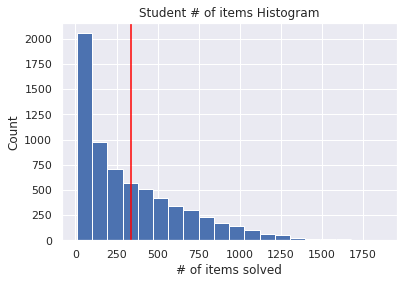

In [12]:
fig, ax = plt.subplots()
stu_groupby['assessmentItemID'].hist(bins=20, ax=ax)
ax.set_title('Student # of items Histogram')
ax.set_xlabel('# of items solved')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['assessmentItemID'].mean(), color='red')
ax.grid(b=True)

#### 사용자 정답률 도수분포표

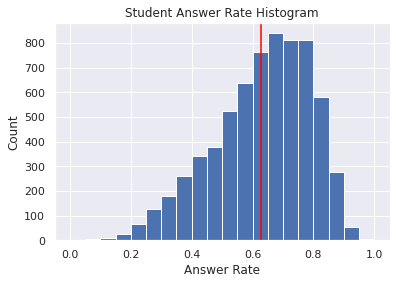

In [13]:
fig, ax = plt.subplots()
stu_groupby['answerCode'].hist(bins=20)
ax.set_title('Student Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

### 문항 별 정답률 분석

In [14]:
prob_groupby = df.groupby('assessmentItemID').agg({
    'userID': 'count',
    'answerCode': percentile
})
prob_groupby.describe()

,userID,answerCode
count,9454.000000,9454.000000
mean,239.748889,0.654256
std,71.893791,0.195488
min,43.000000,0.049430
25%,220.000000,0.505548
50%,230.000000,0.666667
75%,271.000000,0.820513
max,454.000000,0.996310


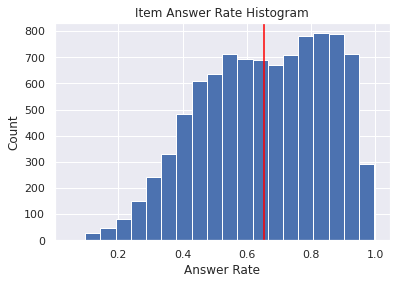

In [15]:
fig, ax = plt.subplots()
prob_groupby['answerCode'].hist(bins=20)
ax.set_title('Item Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(prob_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

### 시험지 별 정답률 분석

In [16]:
test_groupby = df.groupby('testId').agg({
    'userID': 'count',
    'answerCode': percentile
})
test_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


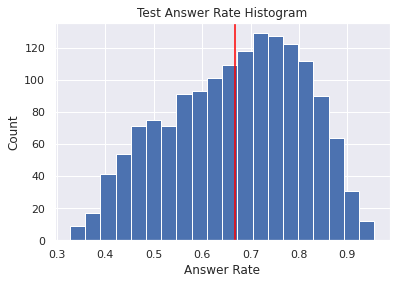

In [17]:
fig, ax = plt.subplots()
test_groupby['answerCode'].hist(bins=20)
ax.set_title('Test Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(test_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

## 1.3 일반적인 EDA

### 문항을 더 많이 푼 학생이 문제를 더 맞추는가?

Text(0.5, 1.0, '# of Questions - Answer Rate')

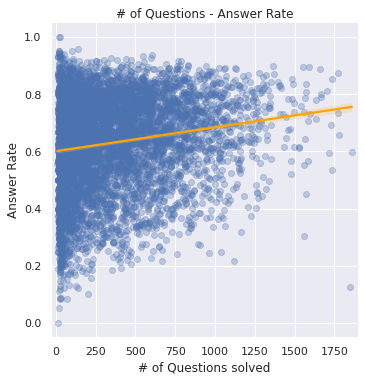

In [18]:
g = sns.lmplot(data=stu_groupby, x='assessmentItemID', y='answerCode',
              scatter_kws={'alpha':0.3}, line_kws={"color": "orange"})
g.set_xlabels('# of Questions solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 1900))
ax = plt.gca()
ax.set_title('# of Questions - Answer Rate')

In [19]:
print(f"Correlation between # of Tags being solved - Answer Rate: {stu_groupby.corr()['assessmentItemID']['answerCode']:.3f}")

Correlation between # of Tags being solved - Answer Rate: 0.168


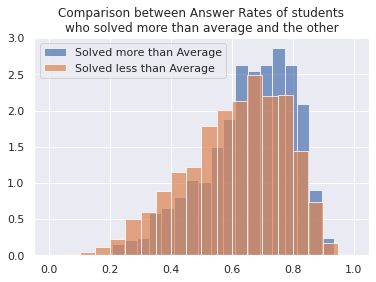

In [20]:
fig, ax = plt.subplots()
ax.set_title('Comparison between Answer Rates of students\nwho solved more than average and the other')
stu_num_mean = stu_groupby['assessmentItemID'].mean()
stu_groupby[stu_groupby['assessmentItemID'] >= stu_num_mean]['answerCode'].hist(bins=20, ax=ax, alpha=0.7, stacked=True, density=1, label='Solved more than Average')
stu_groupby[stu_groupby['assessmentItemID'] < stu_num_mean]['answerCode'].hist(bins=20, ax=ax, alpha=0.7, stacked=True, density=1, label='Solved less than Average')
ax.legend()

### 더 많이 노출된 태그가 정답률이 더 높은가?

In [21]:
tag_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count',
    'answerCode': percentile
})
tag_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


In [22]:
tag_groupby.head(10)

,userID,answerCode
KnowledgeTag,,
23,1800,0.584444
24,358,0.614525
25,92,0.858696
26,2432,0.614309
30,539,0.536178
31,1123,0.552983
32,4282,0.551144
78,1581,0.567362
116,1328,0.544428


Text(0.5, 1.0, '# of Tags Exposed - Answer Rate')

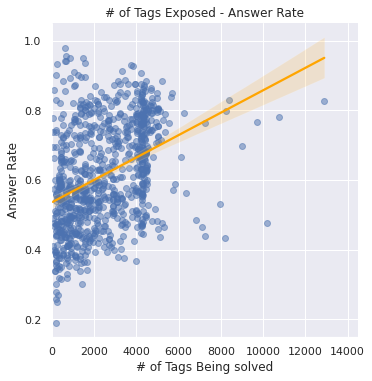

In [23]:
g = sns.lmplot(data=tag_groupby, x='userID', y='answerCode',
              scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 14500))
ax = plt.gca()
ax.set_title('# of Tags Exposed - Answer Rate')

In [24]:
print(f"Correlation between # of Tags being solved - Answer Rate: {tag_groupby.corr()['answerCode']['userID']:.3f}")

Correlation between # of Tags being solved - Answer Rate: 0.376


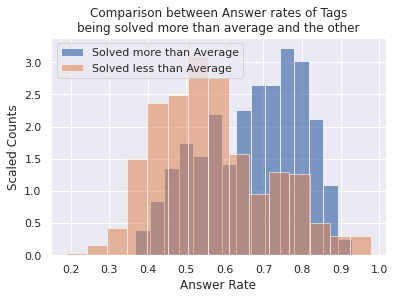

In [25]:
fig, ax = plt.subplots()
ax.set_title('Comparison between Answer rates of Tags\nbeing solved more than average and the other')
tag_ans_mean = tag_groupby['userID'].mean()
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Scaled Counts')
tag_groupby[tag_groupby['userID'] >= tag_ans_mean]['answerCode'].hist(ax=ax, alpha=0.7, bins=15, density=1, stacked=True, label='Solved more than Average')
tag_groupby[tag_groupby['userID'] < tag_ans_mean]['answerCode'].hist(ax=ax, alpha=0.55, bins=15, density=1, stacked=True, label='Solved less than Average')
ax.legend()

### 문항을 풀수록 실력이 늘어나는가?

In [26]:
# 누적합
_cumsum = df.loc[:, ['userID', 'answerCode']].groupby('userID').agg({'answerCode': 'cumsum'})
# 누적갯수
_cumcount = df.loc[:, ['userID', 'answerCode']].groupby('userID').agg({'answerCode': 'cumcount'}) + 1

cum_ans = _cumsum / _cumcount
cum_ans['userID'] = df['userID']
window_sizes = [30, 70, 100, 120]

푼 문항의 갯수가 중앙값 부근인 10명의 학생들

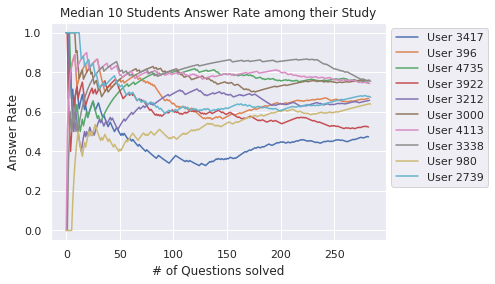

In [27]:
fig, ax = plt.subplots()
ax.set_title('Median 10 Students Answer Rate among their Study')
ax.set_xlabel('# of Questions solved')
ax.set_ylabel('Answer Rate')

samples = df.groupby('userID').agg({'assessmentItemID': 'count'}).sort_values(by='assessmentItemID').index[7442//2-5:7442//2+5]
for idx in samples:
    cum_ans[cum_ans['userID'] == idx]['answerCode'].reset_index(drop=True).plot(ax=ax, label=f'User {idx}')
ax.legend(bbox_to_anchor=(1, 1))

정답률이 중앙값 부근인 10명의 학생들

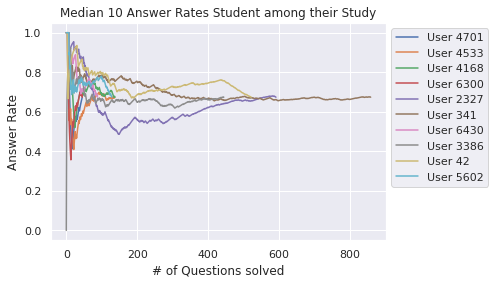

In [28]:
fig, ax = plt.subplots()
ax.set_title('Median 10 Answer Rates Student among their Study')
ax.set_xlabel('# of Questions solved')
ax.set_ylabel('Answer Rate')

samples = df.groupby('userID').agg({'answerCode': percentile}).sort_values(by='answerCode').index[7442//2-5:7442//2+5]
for idx in samples:
    cum_ans[cum_ans['userID'] == idx]['answerCode'].reset_index(drop=True).plot(ax=ax, label=f'User {idx}')
ax.legend(bbox_to_anchor=(1, 1))

Window_size 적용

In [29]:
def plot_rolled_answerrate(userID, ax, window_sizes=[70, 100, 120]):
    
    ax.set_title(f'Students Answer Rate among their Study - User {userID}')
    ax.set_xlabel('# of Questions solved')
    ax.set_ylabel('Answer Rate')

    cum_ans[cum_ans['userID'] == userID]['answerCode'].reset_index(drop=True).plot(
        ax=ax, label=f'Without Window', linewidth=3)

    for wdw_sz in window_sizes:    
        (df[df.userID == userID]['answerCode'].rolling(wdw_sz).sum().reset_index(drop=True) / wdw_sz).plot(
            ax=ax, label=f'Window size {wdw_sz}', alpha=0.8)

    ax.legend()

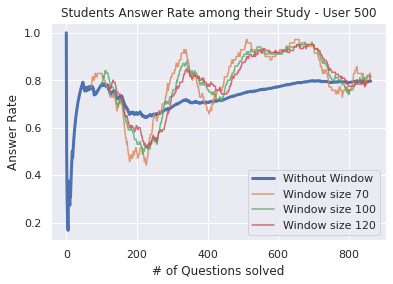

In [30]:
fig, ax = plt.subplots()
plot_rolled_answerrate(500, ax)

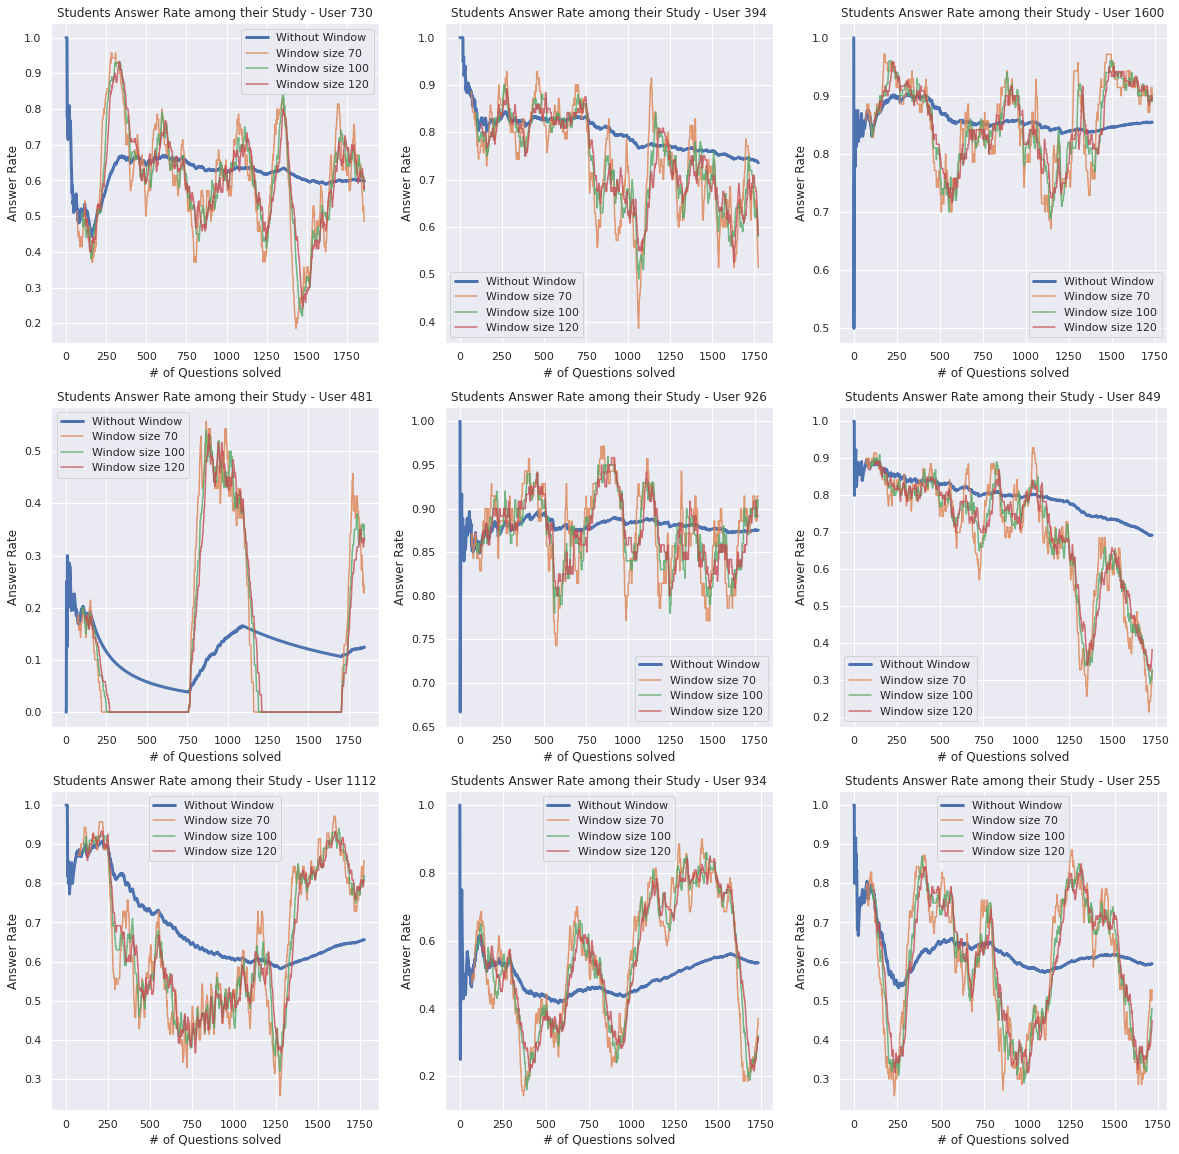

In [31]:
idx = df.groupby('userID').agg({'answerCode': 'count'}).sort_values(by='answerCode', ascending=False).iloc[:9].index
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
plt.title('Top 9 Students who solved the most problems')
for i, userID in enumerate(idx):
    
    r, c = i%3, i//3
    plot_rolled_answerrate(userID, axes[r, c])

### 문항을 푸는 데 걸린 시간과 정답률 사이의 관계는?

In [32]:
diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().fillna(pd.Timedelta(seconds=0))
diff = diff.fillna(pd.Timedelta(seconds=0))
diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

df['elapsed'] = diff

elapsed_answer = df.groupby('elapsed').agg({'answerCode': percentile, 'userID': 'count'})
elapsed_hist = elapsed_answer[elapsed_answer['userID'] > 100]

(-10.0, 650.0)

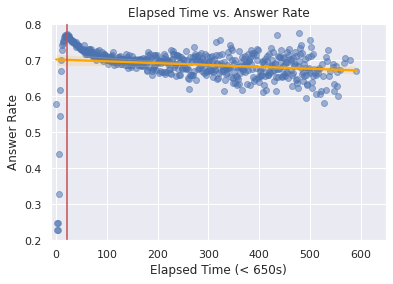

In [33]:
fig, ax = plt.subplots()
g = sns.regplot(x=elapsed_hist.index[:-1], y=elapsed_hist.answerCode.values[:-1],
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ax=ax)
ax.set_title('Elapsed Time vs. Answer Rate')
ax.set_xlabel('Elapsed Time (< 650s)')
ax.set_ylabel('Answer Rate')
ax.axvline(22, color='r')
ax.set_xlim(-10, 650)

# 2. Daily Mission

### (a)
사실 위에서 그린 문항수-정답률 그래프는 큰 insight를 주지 못하는 것 같습니다. 같은 문항을 푼 학생들의 정답률은 당연히 상이하겠지만, 이 평균을 보는 것이 더 의미가 있을 것 같은데 아래처럼 보면 너무 점이 많아서 insight를 얻기 힘드네요.
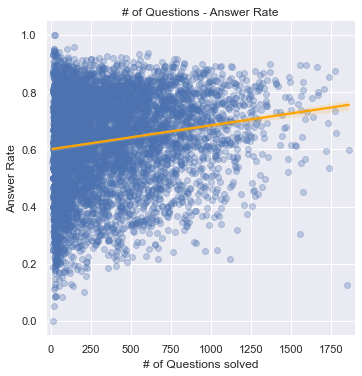

그러면 이번엔 같은 문항수를 푼 학생들이 있다면, 그 학생들의 평균을 찍어서 그래프를 그려봅시다. 가령 9문항을 푼 학생이 10명이라면, 그 학생들의 평균이 찍히도록 말이죠! 아래와 같은 형태이면 좋을 것 같습니다.
- **x-axis**: 사용자가 푼 문항의 수
- **y-axis**: 정답률
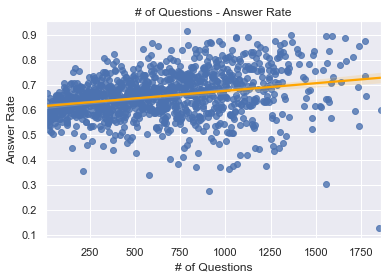

In [34]:
stu_groupby2 = stu_groupby.groupby('assessmentItemID').agg({'answerCode': 'mean'})
stu_groupby2.index.name = 'assessmentItemID'
stu_groupby2.reset_index(inplace=True)
stu_groupby2.head(10)

,assessmentItemID,answerCode
0,9,0.555556
1,13,0.666667
2,14,0.629870
3,15,0.612963
4,16,0.547697
5,17,0.572193
6,18,0.549645
7,19,0.563300
8,20,0.585897
9,21,0.592593


Text(0.5, 1.0, '# of Questions - Answer Rate')

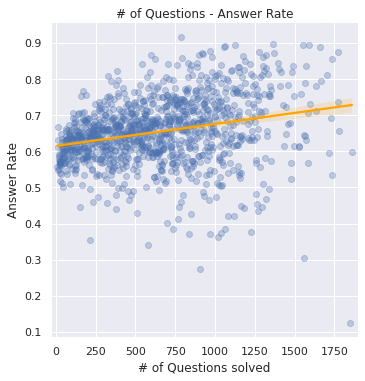

In [35]:
g = sns.lmplot(data=stu_groupby2, x='assessmentItemID', y='answerCode',
              scatter_kws={'alpha':0.3}, line_kws={"color": "orange"})
g.set_xlabels('# of Questions solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 1900))
ax = plt.gca()
ax.set_title('# of Questions - Answer Rate')

### (b)

그런데 위 그래프도... 사실 점이 너무 많습니다. 이것보다 더 줄이려면 단순히 같은 문항수를 푼 학생들끼리 평균을 집계하는 것이 아니라, 어느 정도 비슷한 문항을 푼 학생들을 전부 집계하면 좋을 것 같네요. 예를 들면 9 ~ 14문항을 푼 학생들을 묶어서 평균을 내는 것처럼요.   
`bins` 값을 주었을 때 bins 만큼 그래프에 점이 찍히도록, 예를 들어 bins=500이었다면 아래와 같이 500개의 bin을 만들어서 그래프가 그려지도록 해주세요 :)    

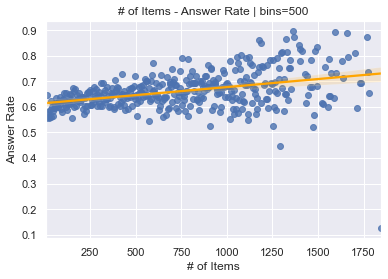

In [36]:
bins = 500
b = pd.cut(stu_groupby2['assessmentItemID'], bins)
stu_groupby3 = stu_groupby2.groupby(b).agg({'answerCode': 'mean'})
stu_groupby3['assessmentItemID'] = b.cat.categories.mid
stu_groupby3.head(10)

,answerCode,assessmentItemID
assessmentItemID,,
"(7.149, 12.702]",0.555556,9.9255
"(12.702, 16.404]",0.614299,14.5530
"(16.404, 20.106]",0.567759,18.2550
"(20.106, 23.808]",0.582307,21.9570
"(23.808, 27.51]",0.547138,25.6590
"(27.51, 31.212]",0.575482,29.3610
"(31.212, 34.914]",0.581032,33.0630
"(34.914, 38.616]",0.574439,36.7650
"(38.616, 42.318]",0.609245,40.4670


Text(0.5, 1.0, '# of Questions - Answer Rate')

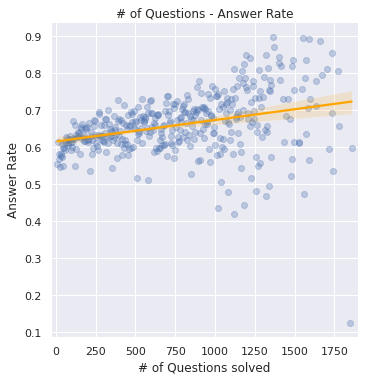

In [37]:
g = sns.lmplot(data=stu_groupby3, x='assessmentItemID', y='answerCode',
              scatter_kws={'alpha':0.3}, line_kws={"color": "orange"})
g.set_xlabels('# of Questions solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 1900))
ax = plt.gca()
ax.set_title('# of Questions - Answer Rate')

# 3. 그 밖의 생각해볼 수 있는 것들

### 더 많이 노출된 시험지는 정답률이 높을까?

In [38]:
test_groupby = df.groupby('testId').agg({
    'userID': 'count',
    'answerCode': percentile
})
test_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


In [39]:
test_groupby.index.name = 'testId'
test_groupby.reset_index(inplace=True)
test_groupby.head(10)

,testId,userID,answerCode
0,A010000001,1585,0.926183
1,A010000002,1550,0.931613
2,A010000003,1615,0.846440
3,A010000004,1540,0.883117
4,A010000005,1595,0.855172
5,A010000006,1550,0.847097
6,A010000007,1570,0.822293
7,A010000008,1585,0.895899
8,A010000009,1590,0.815094
9,A010000010,1580,0.842405


Text(0.5, 1.0, '# of Tests Being Solved - Answer Rate')

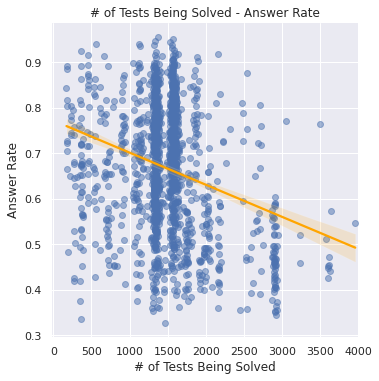

In [40]:
g = sns.lmplot(data=test_groupby, x='userID', y='answerCode',
              scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
g.set_xlabels('# of Tests Being Solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 4000))
ax = plt.gca()
ax.set_title('# of Tests Being Solved - Answer Rate')

In [41]:
test_groupby2 = test_groupby.groupby('userID').agg({'answerCode': 'mean'})
test_groupby2.index.name = 'userID'
test_groupby2.reset_index(inplace=True)
test_groupby2.head(10)

,userID,answerCode
0,172,0.843023
1,176,0.698864
2,180,0.769444
3,184,0.860507
4,188,0.484043
5,220,0.650000
6,225,0.804444
7,230,0.778261
8,235,0.742553
9,258,0.794574


Text(0.5, 1.0, '# of Tests Being Solved - Answer Rate')

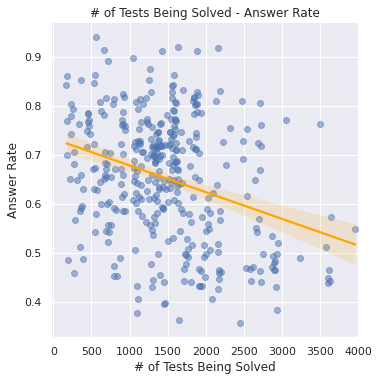

In [42]:
g = sns.lmplot(data=test_groupby2, x='userID', y='answerCode',
              scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
g.set_xlabels('# of Tests Being Solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 4000))
ax = plt.gca()
ax.set_title('# of Tests Being Solved - Answer Rate')

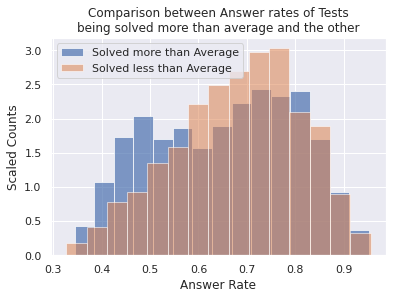

In [43]:
fig, ax = plt.subplots()
ax.set_title('Comparison between Answer rates of Tests\nbeing solved more than average and the other')
test_ans_mean = test_groupby['userID'].mean()
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Scaled Counts')
test_groupby[test_groupby['userID'] >= test_ans_mean]['answerCode'].hist(ax=ax, alpha=0.7, bins=15, density=1, stacked=True, label='Solved more than Average')
test_groupby[test_groupby['userID'] < test_ans_mean]['answerCode'].hist(ax=ax, alpha=0.55, bins=15, density=1, stacked=True, label='Solved less than Average')
ax.legend()

### 같은 시험지의 내용이나 같은 태그의 내용을 연달아 풀면, 정답률이 오를까?

In [44]:
train_user = df[df.userID == 0]
samples_1 = train_user[train_user.assessmentItemID == 'A060001001'].reset_index(drop=True)
samples_1.loc[:, 'attempt_number'] = range(1, samples_1.shape[0]+1)
samples_1.loc[:, 'attempt_type'] = 'repeated_attempt'
samples_1.loc[0, 'attempt_type'] = 'first_attempt'
samples_1.style.background_gradient()

,Unnamed: 0,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,Category,Number,Time,solTime,hour,weekday,total_used_time,past_count,past_correct,average_correct,past_tag_count,past_tag_correct,average_tag_correct,past_content_count,past_content_correct,average_content_correct,elapsed,attempt_number,attempt_type
0,0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1001,1585009031,3,0,1,3,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,1,first_attempt


In [52]:
test_groupby = df.groupby('past_content_count').agg({
    'userID': 'count',
    'answerCode': percentile
})
test_groupby.head(20)

,userID,answerCode
past_content_count,,
0,2220633,0.654647
1,45119,0.645138
2,834,0.438849


### 정답을 특별히 잘 맞추는 시간대가 있을까?

In [56]:
times = pd.to_datetime(df.Timestamp)
hour_groupby = df.groupby(times.dt.hour).agg({'answerCode': 'mean'})
hour_groupby.index.name = 'Hour'
hour_groupby.reset_index(inplace=True)
hour_groupby.head(24)

,Hour,answerCode
0,0,0.649446
1,1,0.644321
2,2,0.642410
3,3,0.632685
4,4,0.633292
5,5,0.624776
6,6,0.629941
7,7,0.643050
8,8,0.667948
9,9,0.682764


<AxesSubplot:xlabel='Hour'>

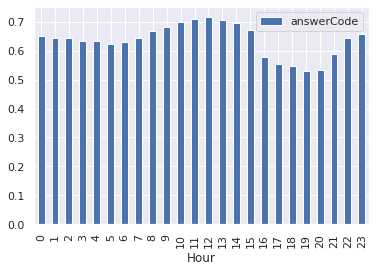

In [47]:
ax.set_title('Hour - Answer Rate')
ax.set_xlabel('Hour')
ax.set_ylabel('Scaled Counts')
hour_groupby.plot.bar(x='Hour', y='answerCode')

In [48]:
times = pd.to_datetime(df.Timestamp)
day_groupby = df.groupby(times.dt.weekday).agg({'answerCode': 'mean'})
day_groupby.index.name = 'Day'
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_groupby['Weekday_name'] = days
day_groupby.reset_index(inplace=True)
day_groupby.head(24)

,Day,answerCode,Weekday_name
0,0,0.676518,Mon
1,1,0.667046,Tue
2,2,0.641011,Wed
3,3,0.658466,Thu
4,4,0.643362,Fri
5,5,0.603206,Sat
6,6,0.675257,Sun


<AxesSubplot:xlabel='Weekday_name'>

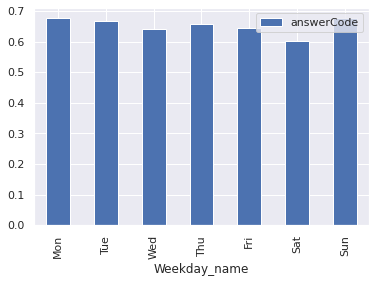

In [49]:
ax.set_title('Day - Answer Rate')
ax.set_xlabel('Day')
ax.set_ylabel('Scaled Counts')
day_groupby.plot.bar(x='Weekday_name', y='answerCode')

### 

In [50]:
from tqdm import tqdm

times = pd.to_datetime(df.Timestamp)
hour = []
day=[]
for t in tqdm(times):
#     print(t.hour, t.weekday())
    hour.append(t.hour)
    day.append(t.weekday())
df['day'] = day
df['hour'] = hour

dayhour_groupby = df.groupby(['day', 'hour']).agg({'answerCode': 'mean'})
# dayhour_groupby.index.name = 'DayHour'
# dayhour_groupby.reset_index(inplace=True)
dayhour_groupby['DayHour'] = [i for i in range(168)]
dayhour_groupby.head(48)

100%|██████████| 2266586/2266586 [00:06<00:00, 351123.76it/s]


answerCode  DayHour
day hour                     
0   0       0.672334        0
    1       0.677989        1
    2       0.685845        2
    3       0.684593        3
    4       0.691438        4
    5       0.666311        5
    6       0.663519        6
    7       0.664538        7
    8       0.672930        8
    9       0.683886        9
    10      0.691954       10
    11      0.705561       11
    12      0.716985       12
    13      0.692007       13
    14      0.673965       14
    15      0.648231       15
    16      0.592484       16
    17      0.584924       17
    18      0.574468       18
    19      0.526633       19
    20      0.532167       20
    21      0.588153       21
    22      0.683212       22
    23      0.680858       23
1   0       0.672766       24
    1       0.660292       25
    2       0.659095       26
    3       0.656061       27
    4       0.646988       28
    5       0.638249       29
    6       0.639787       30
    7       0.656538       31
    8       0.682866       32
    9       0.697431       33
    10      0.711185       34
    11      0.713979       35
    12      0.717426       36
    13      0.707822       37
    14      0.708832       38
    15      0.680246       39
    16      0.568790       40
    17      0.571784       41
    18      0.534630       42
    19      0.526268       43
    20      0.528583       44
    21      0.573874       45
    22      0.630705       46
    23      0.660391       47

<AxesSubplot:xlabel='DayHour'>

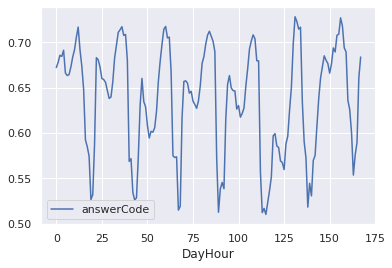

In [51]:
ax.set_title('DayHour - Answer Rate')
ax.set_xlabel('DayHour')
ax.set_ylabel('Scaled Counts')
dayhour_groupby.plot.line(x='DayHour', y='answerCode')